Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset

In [1]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Read dataset
sales_data = pd.read_csv("sales_data_with_discounts.csv")

In [3]:
sales_data.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [5]:
sales_data.describe(include='all')

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450,450,450,450,450.000000,450,450,450,450.000000,450.000000,450.000000,450.000000,450.000000
unique,15,7,30,1,NaN,3,9,30,NaN,NaN,NaN,NaN,NaN
top,01-04-2021,Thursday,M01,C,NaN,Mobiles,Jeera,RU-10,NaN,NaN,NaN,NaN,NaN
freq,30,90,15,450,NaN,150,90,15,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,5.066667,NaN,NaN,NaN,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,NaN,NaN,NaN,NaN,4.231602,NaN,NaN,NaN,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,290.000000,400.000000,5.007822,69.177942,326.974801
25%,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,10100.000000,53200.000000,18.114718,5316.495427,47847.912852


In [6]:
sales_data.isna().sum()

Date                 0
Day                  0
SKU                  0
City                 0
Volume               0
BU                   0
Brand                0
Model                0
Avg Price            0
Total Sales Value    0
Discount Rate (%)    0
Discount Amount      0
Net Sales Value      0
dtype: int64

In [3]:
sales_data['Date'] = pd.to_datetime(sales_data['Date'],errors='coerce')

In [4]:
#Identify numerical columns in the dataset
numerical_col = sales_data.select_dtypes(np.number).columns

In [5]:
numerical_col 

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [6]:
# Identify categorical columns
sales_data.select_dtypes(object)

,Day,SKU,City,BU,Brand,Model
0,Thursday,M01,C,Mobiles,RealU,RU-10
1,Thursday,M02,C,Mobiles,RealU,RU-9 Plus
2,Thursday,M03,C,Mobiles,YouM,YM-99
3,Thursday,M04,C,Mobiles,YouM,YM-99 Plus
4,Thursday,M05,C,Mobiles,YouM,YM-98
...,...,...,...,...,...,...
445,Thursday,L06,C,Lifestyle,Jeera,M-Casuals
446,Thursday,L07,C,Lifestyle,Viva,W-Western
447,Thursday,L08,C,Lifestyle,Viva,W-Lounge
448,Thursday,L09,C,Lifestyle,Jeera,M-Formals


In [42]:
sales_data.select_dtypes(np.number).describe(include='all').round(2)

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.00,450.00,450.00,450.00,450.00,450.00
mean,5.07,10453.43,33812.84,15.16,3346.50,30466.34
std,4.23,18079.90,50535.07,4.22,4509.90,46358.66
min,1.00,290.00,400.00,5.01,69.18,326.97
25%,3.00,465.00,2700.00,13.97,460.46,2202.21
50%,4.00,1450.00,5700.00,16.58,988.93,4677.79
75%,6.00,10100.00,53200.00,18.11,5316.50,47847.91
max,31.00,60100.00,196400.00,19.99,25738.02,179507.48


For sales data, 
- The avg price is 10453.43 with min and max values 290.00 and 60100.00	respectively.
- On an average 15.16 % discount is given to the customer with min -5.01% and max -19.99& discount rate.
- Max total sales value before giving discount is 196400 and avg sales value is 33812.84 with std div 50535.07
- Avg Net sales value before giving discount is 179507.48 with min - 326.97 rs and max -179507.48rs

In [37]:
## calculate mean for each numerical columns
sales_data.select_dtypes(np.number).mean().round(2)

Volume                   5.07
Avg Price            10453.43
Total Sales Value    33812.84
Discount Rate (%)       15.16
Discount Amount       3346.50
Net Sales Value      30466.34
dtype: float64

In [38]:
## calculate median for each numerical columns
sales_data.select_dtypes(np.number).median().round(2)

Volume                  4.00
Avg Price            1450.00
Total Sales Value    5700.00
Discount Rate (%)      16.58
Discount Amount       988.93
Net Sales Value      4677.79
dtype: float64

In [41]:
## calculate mode for each numerical columns
print(sales_data.select_dtypes(np.number).mode(axis=0))

     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0       3.0      400.0            24300.0           5.007822        69.177942   
1       NaN      450.0                NaN           5.055218        73.025199   
2       NaN      500.0                NaN           5.059801        93.649161   
3       NaN     1300.0                NaN           5.072124        94.682735   
4       NaN     8100.0                NaN           5.084108       102.705757   
..      ...        ...                ...                ...              ...   
445     NaN        NaN                NaN          19.940610     17900.983733   
446     NaN        NaN                NaN          19.965340     21153.498820   
447     NaN        NaN                NaN          19.976879     21496.675367   
448     NaN        NaN                NaN          19.982257     25328.224204   
449     NaN        NaN                NaN          19.992407     25738.022194   

     Net Sales Value  
0   

In [40]:
## calculate standard deviation for each numerical columns
sales_data.select_dtypes(np.number).std().round(2)

Volume                   4.23
Avg Price            18079.90
Total Sales Value    50535.07
Discount Rate (%)        4.22
Discount Amount       4509.90
Net Sales Value      46358.66
dtype: float64

#### Data Visualization

●	Histograms:

	Plot histograms for each numerical column.
	Analyze the distribution (e.g., skewness, presence of outliers) and provide inferences


array([[<Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Avg Price'}>],
       [<Axes: title={'center': 'Total Sales Value'}>,
        <Axes: title={'center': 'Discount Rate (%)'}>],
       [<Axes: title={'center': 'Discount Amount'}>,
        <Axes: title={'center': 'Net Sales Value'}>]], dtype=object)

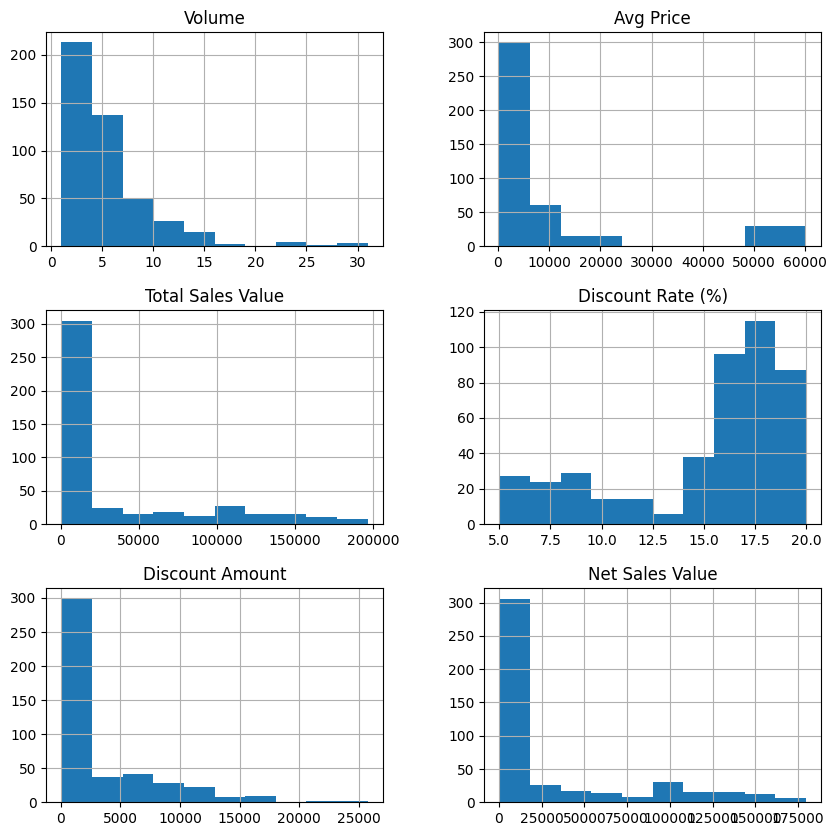

In [20]:
sales_data[numerical_col].hist(figsize=(10,10))

- 1. For 'Volume' data distribution is positively sckewed. We can see most of the values lies between 0-15 and are concentrated at left side and outlires are appers on the right side of the distribution.

- 2. For 'Avg Price', 'Total Sales Value', 'Discount Amount', 'Net Sales Value' also data distribution is positively sckewed and outlires are appers on the right side of the data distribution.

- 3. For 'Discout Rate %', the data distribution is negatively sckewed. We can clearly see that as the amount increases the discounted price also increses. Most of the data points are concentrated at left side nd outlires are appers on the left side of the distribution.
 


#### Box Plot
- 	Create boxplots for numerical variables to identify outliers and the interquartile range.

Volume                Axes(0.125,0.77;0.775x0.11)
Avg Price            Axes(0.125,0.638;0.775x0.11)
Total Sales Value    Axes(0.125,0.506;0.775x0.11)
Discount Rate (%)    Axes(0.125,0.374;0.775x0.11)
Discount Amount      Axes(0.125,0.242;0.775x0.11)
Net Sales Value       Axes(0.125,0.11;0.775x0.11)
dtype: object

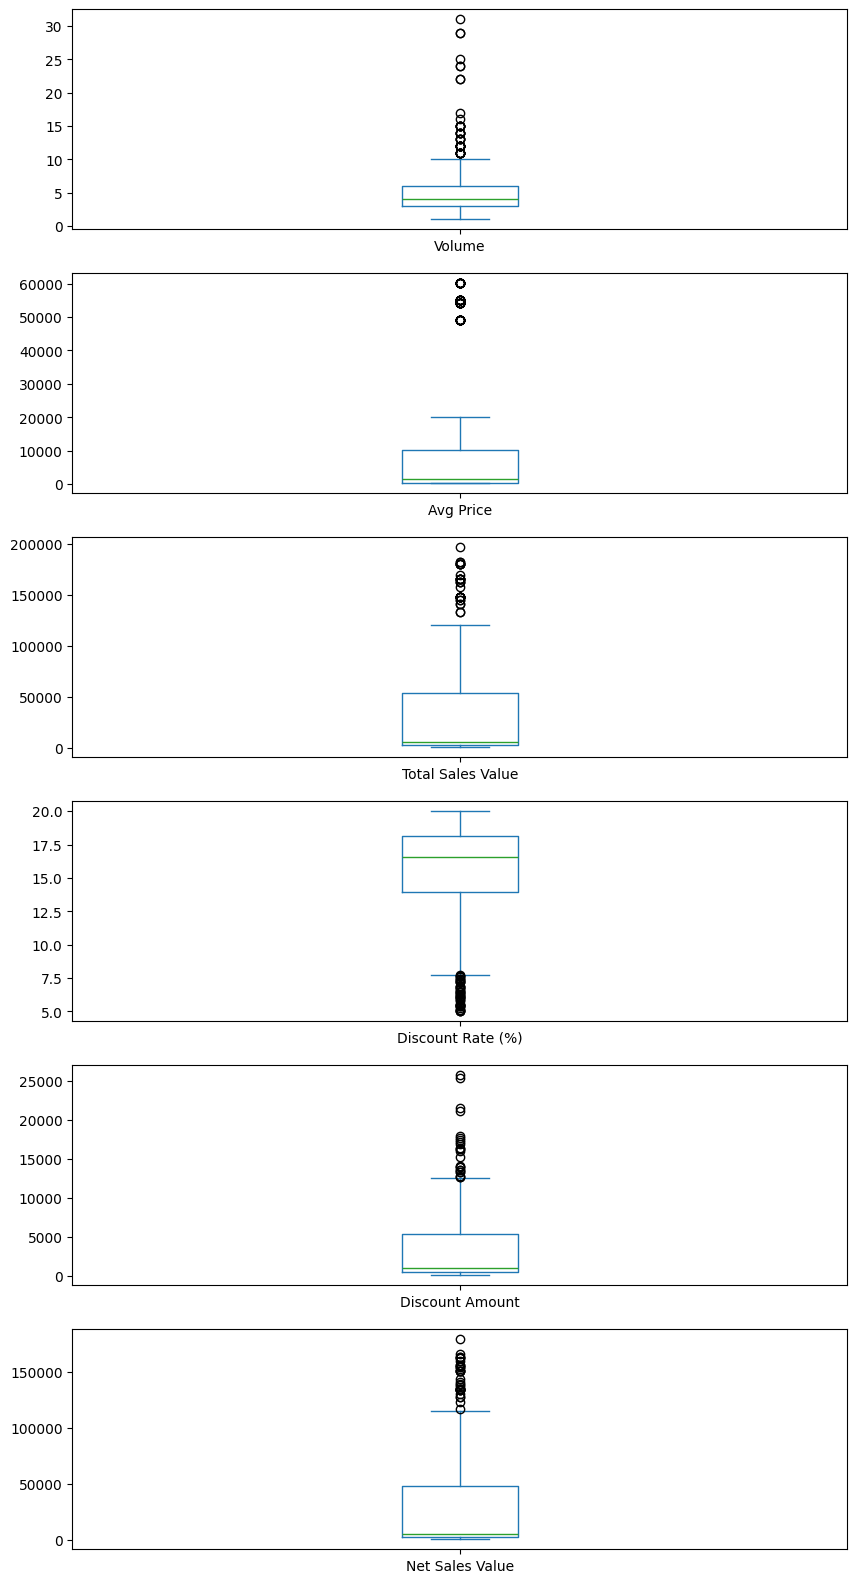

In [ ]:
sales_data[numerical_col].plot(kind='box',subplots=True,layout=(len(numerical_col),1),figsize=(10,20),colormap=)

 - By using the plot we can see that almost each feature have oulires. Except 'Avg Price' rest of the features are having more extreme values.

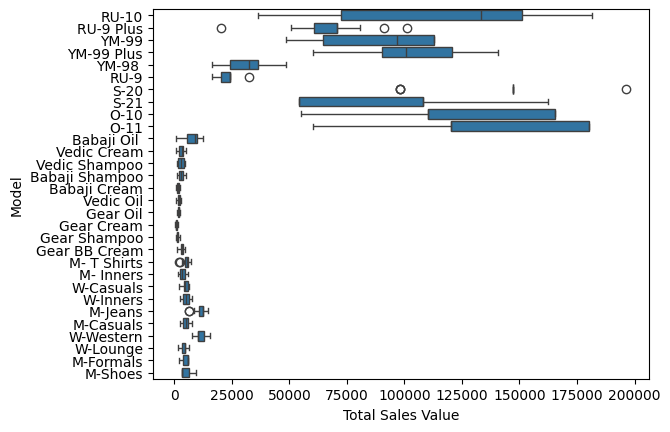

In [20]:
sns.boxplot(x = sales_data['Total Sales Value'],y = sales_data['Model'])
plt.show()

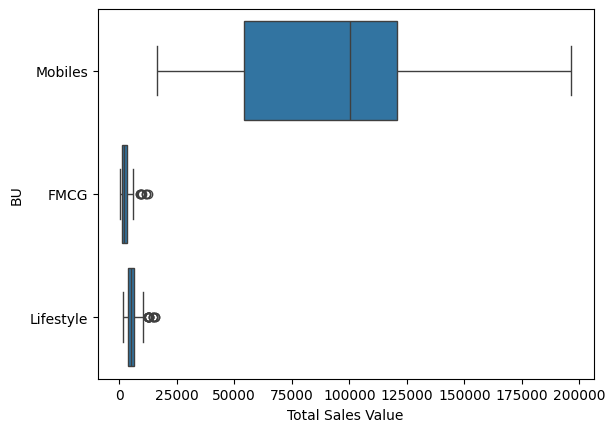

In [21]:
sns.boxplot(x = sales_data['Total Sales Value'],y = sales_data['BU'])
plt.show()

●	Bar Chart Analysis for Categorical Column:

	Identify categorical columns in the dataset.
	Create bar charts to visualize the frequency or count of each category.
	Analyze the distribution of categories and provide insights.


In [48]:
# Identify categorical columns
categorical_col = sales_data.select_dtypes(object).columns
categorical_col

Index(['Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

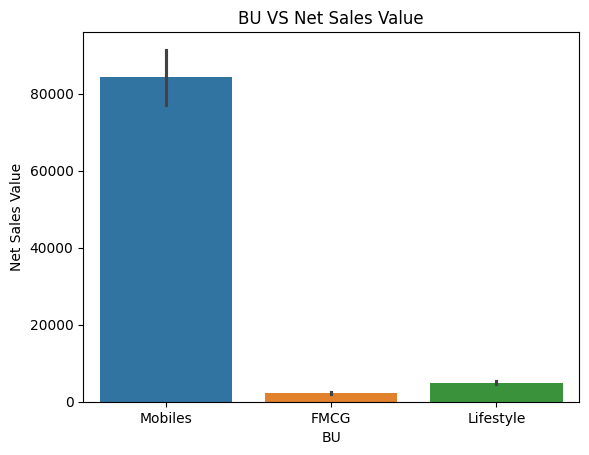

In [43]:
sns.barplot(sales_data, x='BU',y = 'Net Sales Value',hue= 'BU')
plt.title('BU VS Net Sales Value')
plt.show()

 - The above graph depicts that the most selling categoey from Business Unit is 'Mobile' as compare to FMCG and Lifestyle.

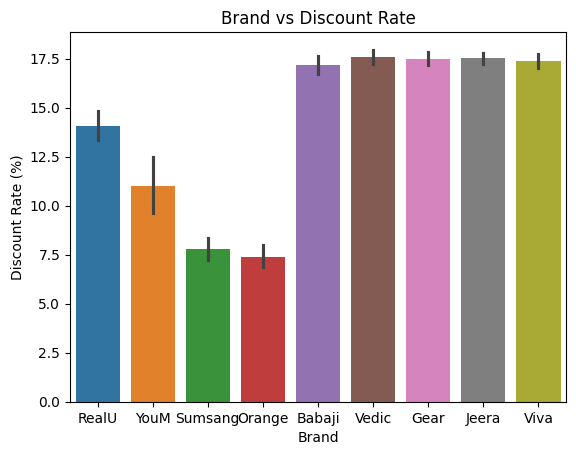

In [46]:
sns.barplot(sales_data, x='Brand',y = 'Discount Rate (%)',hue = 'Brand',orient='v',)
plt.title('Brand vs Discount Rate')
plt.show()

 - From the above graph, we can say that more discount rate is given in the 'Lifestyle' category.

#### Standardization of Numerical Variables
●	Objective: To scale numerical variables for uniformity, improving the dataset’s suitability for analytical models.


In [60]:
numerical_col = sales_data.select_dtypes(np.number)

In [61]:
scaler = StandardScaler()

In [62]:
scaled_data = scaler.fit_transform(numerical_col)

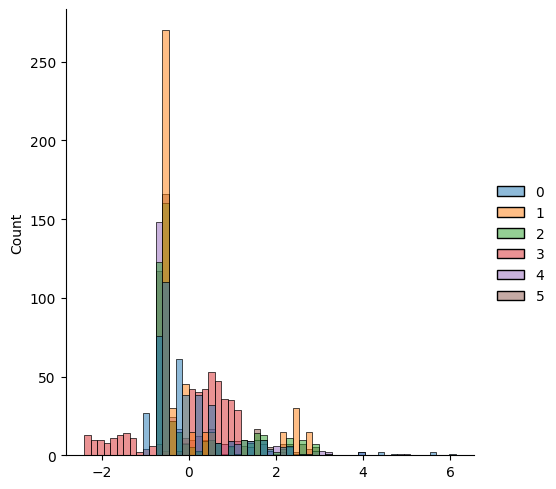

In [63]:
### Data Distribution on scaled data
sns.displot(scaled_data)
plt.show()

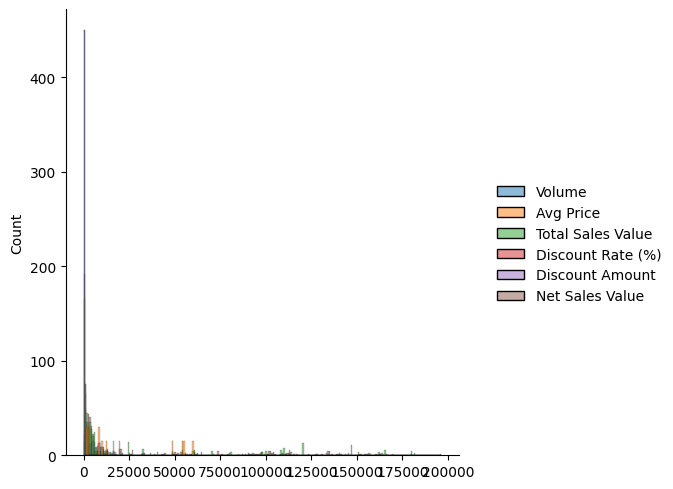

In [64]:
### Data Distribution before scaled data
sns.displot(numerical_col)
plt.Figure(figsize=(10,15))
plt.show()

 - Standization is used imporove the performnace of the model and predictions more accurately.In standardization we brings down all the features on a common scale.

#### Conversion of Categorical Data into Dummy Variables

●	Objective: To transform categorical variables into a format that can be provided to ML algorithms.

In [49]:
# Identify categorical columns
categorical_col = sales_data.select_dtypes(object)


In [18]:
encoder = OneHotEncoder(sparse_output = False)

In [51]:
encoder.fit(categorical_col)

OneHotEncoder(sparse_output=False)

In [53]:
encoded_col = encoder.transform(categorical_col)

In [57]:
encoded_df = pd.DataFrame(encoded_col)

In [58]:
new_sales_df = sales_data.join(encoded_df)

In [59]:
new_sales_df.head() 

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,...,70,71,72,73,74,75,76,77,78,79
0,2021-01-04,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-01-04,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-01-04,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2021-01-04,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2021-01-04,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


##### One hot encoding is a part of One Hot Encoding, it used to convert categorical datatype into numerical value so that the machine learning algorithm can understand the data and get better prediction.
